Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

Function to plot degree distribution of graph

In [41]:
def plot_degree_distribution(G):
    """
    Plots the degree distribution of any given graph 
 
    Args:
        G (graph): Network of authors
 
    Returns:
        float: 1D array of size equal to number of nodes of network
    """
    degrees = dict(G.degree())

    # Calculate the degree distribution
    degree_distribution = [list(degrees.values()).count(i) for i in range(max(degrees.values()) + 1)]

    # Normalize the degree distribution to obtain probabilities
    total_nodes = len(G.nodes())
    degree_distribution_prob = [count / total_nodes for count in degree_distribution]

    # Plot the degree distribution
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(degree_distribution_prob)), degree_distribution_prob, width=0.8, color='b', alpha=0.7)
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Degree Distribution of the Network')
    plt.xticks(range(len(degree_distribution_prob)))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
        

Initializing the network

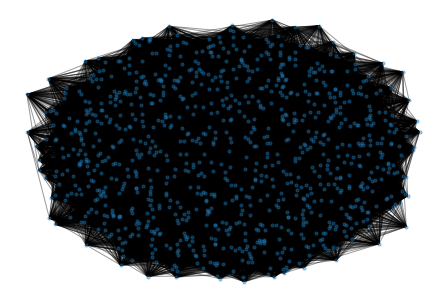

In [94]:
N=1000
G=nx.erdos_renyi_graph(N,0.1)
nx.draw(G,alpha=0.4, node_size=10)

Plotting the degree distribution of network

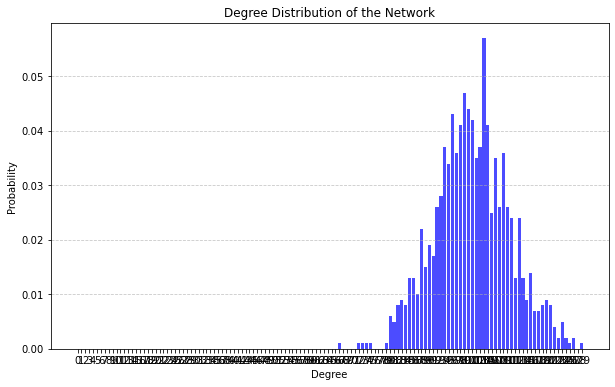

In [95]:
plot_degree_distribution(G)

Initializing the parameters

time steps

In [190]:
t=10**6

Number of coins for each agent=500

In [191]:
coins=500*np.ones(N)

Introducing 2 banks with $\rho_{1}$ = 0.3 and $\rho_{2}$ = 0.7 

In [192]:
b1=300
b2=700

Intializing the number of coins in each bank to be 10000 coins for each bank

In [193]:
r1=10**5
r2=10**5

Alotting each agent a bank randomly

In [194]:
x=np.arange(N)
shuffled=sorted(x, key=lambda k: random.random())
bank1=shuffled[0:300]
bank2=shuffled[300:1000]


Main function to run the simulation





In [196]:
for _ in range(t):
    x=np.random.choice(N)
    bankx = bank1 if x in bank1 else bank2 
        
    neighbors=list(G.neighbors(x))
    
    if neighbors:
        
        y=np.random.choice(neighbors)
    
        banky = bank1 if y in bank1 else bank2

        
        if coins[x] >= 1:
            coins[x] -=1

            if coins[y] < 0:
                if random.random() < 0.5:
                    if banky == bank1:
                        r1 +=1
                    else:
                        r2 +=1
                        
                else:
                    coins[y] +=1
            else:
                coins[y] +=1


        else:
            
            if bankx== bank1:
                if r1 > 0:
                    coins[x] -=1
                    r1 -=1
                    
                    if coins[y] < 0:
                        if random.random() < 0.5:
                            if banky== bank1:
                                r1 +=1
                            else:
                                r2 +=1
                        else:
                            coins[y] +=1
                    else:
                        coins[y] +=1
                        
            else:
                if r2 > 0:
                    coins[x]-=1
                    r2-=1
                    
                    if coins[y] < 0:
                        if random.random() < 0.5:
                            if banky== bank1:
                                r1+=1
                            else:
                                r2+=1
                        else:
                            coins[y]+=1
                    else:
                        coins[y]+=1
                       
                    


        

Function to plot the distribution of money

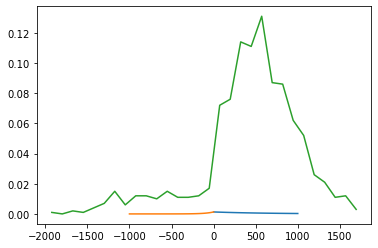

In [197]:
M=5*10**5+ 2*10**4
rho=20000/M
T=M/N
mu=1/T * (np.sqrt(1+rho) - np.sqrt(rho))**2

a =1/T * (1- np.sqrt(rho/(1+rho)))

b=1/T * (np.sqrt((1+rho)/rho -1))


x = np.linspace(0,1000, 100)
y = np.linspace(0,-1000, 100)
plt.plot(x, mu*np.exp(-a*x))
plt.plot(y,mu*np.exp(b*y))


A=np.array(coins)
n,bins=np.histogram(A,bins=30)
mid_bin=[]
d_bin=[]
for i in range(len(n)):
    x=bins[i] + bins[i+1]
    y=bins[i+1] -bins[i]
    mid_bin.append(x/2.0)
    d_bin.append(y)

plt.plot(mid_bin,n/N)

